In [7]:
import numpy as np
import pandas as pd
from scipy.fft import fftn, ifftn, fftshift
import re

import matplotlib.pyplot as plt

def get_data(U,mu):
    '''
    reads a FRG output text file
    and returns the number of k1 and k2 points used, as well as the data for all three action channels

    '''
  


    df = pd.read_csv("1NN_" + f"{U}" +"_"+ f"{mu}" + "_40_10.txt", delimiter="\t", header = None, skiprows = 1) 

    r = df.iloc[-1, 0]
    n = r.split()

    tc, sc, mag, cdw, _ = map(float, n)

    orders = [sc, mag, cdw]
    o_max = max(orders)

    dominant = orders.index(o_max)

    


    return (tc, sc, mag, cdw, dominant)

In [19]:
Us= np.array([0,1,2,3,4,5,6,7,8])
mus= [0, 0.25, 0.50, 1]

X, Y = np.meshgrid(mus, Us)
Tcs = np.zeros((9,4))
dom = np.zeros((9,4))

for i, u in enumerate(Us):
    for j, mu in enumerate(mus):
        
        Tcs[i][j] = get_data(u,mu)[0]
        dom[i][j] = get_data(u, mu)[4]

/tmp/ipykernel_16224/1886017685.py:5: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, Tcs,  levels = 30, cmap = 'coolwarm', linewidths=1.5)


Text(0.5, 0, '$\\mu$')

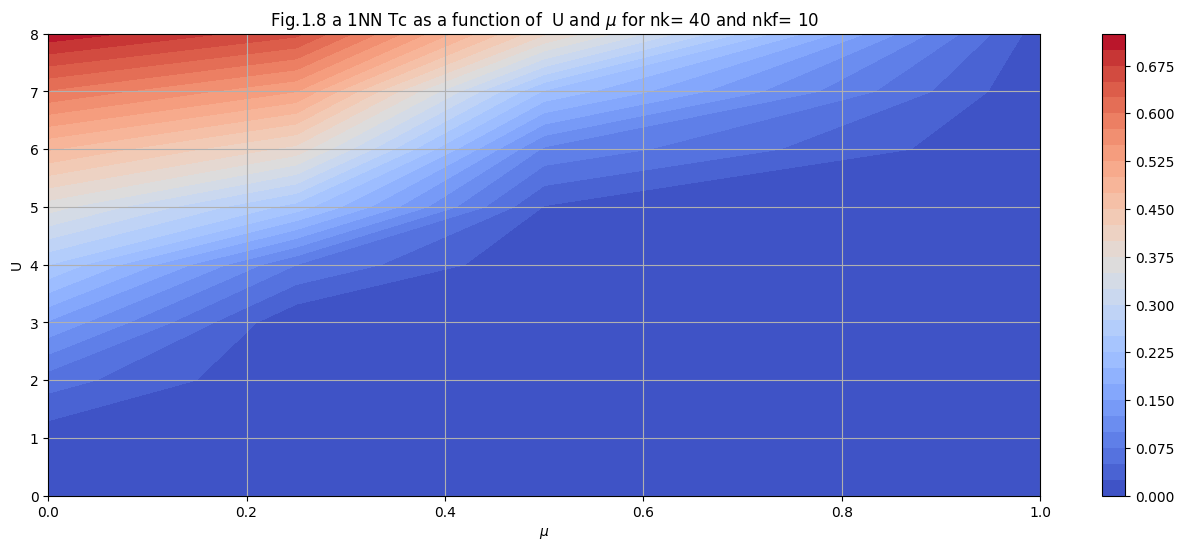

In [24]:
fig, ax = plt.subplots(figsize=(16, 6))

#ax.set_aspect('equal')
ax.grid()
C = ax.contourf(X, Y, Tcs,  levels = 30, cmap = 'coolwarm', linewidths=1.5)
fig.colorbar(C, ax=ax, orientation='vertical')

ax.set_title(f"Fig.1.8 a 1NN Tc as a function of  U and $\mu$ for nk= 40 and nkf= 10")
ax.set_ylabel("U")
ax.set_xlabel(r"$\mu$")

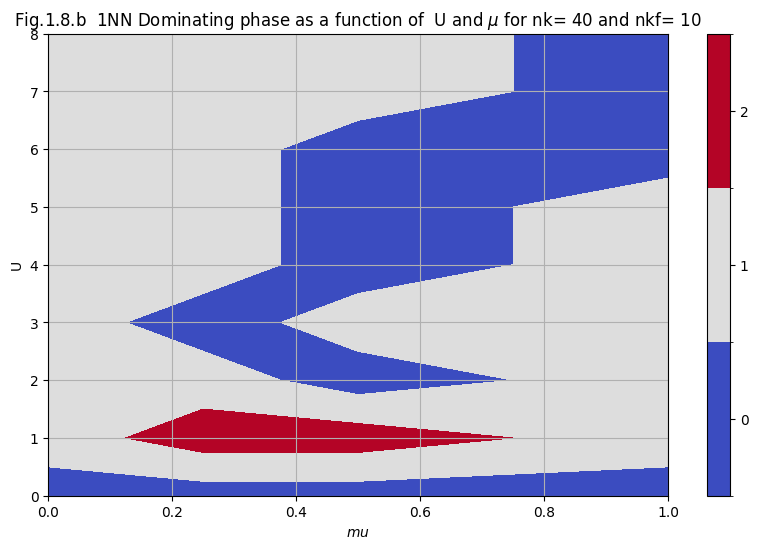

In [26]:
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(10, 6))

ax.grid()

ax.set_title(f"Fig.1.8.b  1NN Dominating phase as a function of  U and $\mu$ for nk= 40 and nkf= 10")
ax.set_ylabel("U")
ax.set_xlabel(r"$mu$")
#C = ax.contourf(X, Y, dom,levels = 50, cmap = 'coolwarm', linewidths=1.5)
#fig.colorbar(C, ax=ax, orientation='vertical')

cmap = plt.get_cmap('coolwarm', 3)  # '3' ensures there are 3 distinct colors

# Define boundaries for the 3 categories.
bounds = [-0.5, 0.5, 1.5, 2.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create the contour plot using the discrete colormap and norm.

C = ax.contourf(X, Y, dom, levels=bounds, cmap=cmap, norm=norm)

# Add a colorbar with ticks matching the discrete values.
cbar = plt.colorbar(C, ticks=[0, 1, 2])
plt.show()


/tmp/ipykernel_16224/94246461.py:8: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, dom,levels = 50, cmap = 'coolwarm', linewidths=1.5)


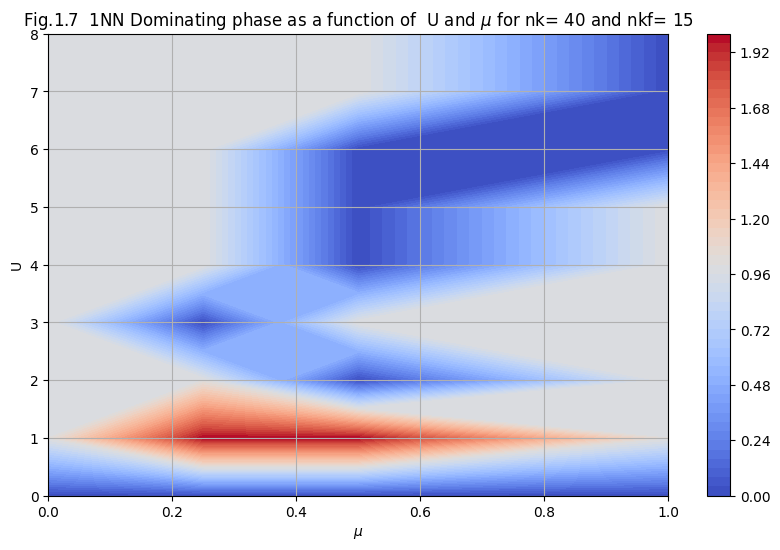

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.grid()

ax.set_title(f"Fig.1.7  1NN Dominating phase as a function of  U and $\mu$ for nk= 40 and nkf= 15")
ax.set_ylabel("U")
ax.set_xlabel(r"$\mu$")
C = ax.contourf(X, Y, dom,levels = 50, cmap = 'coolwarm', linewidths=1.5)
fig.colorbar(C, ax=ax, orientation='vertical')
